In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

## **Load Dataset**

In [ ]:
# Download latest version of the dataset
path = kagglehub.dataset_download("pahuljotsingh/us-home-price-and-economic-indicators-20042024")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded directory
csv_file = None
for root, _, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            break
    if csv_file:
        break

if csv_file:
    df = pd.read_csv(csv_file)
    display(df.head())
else:
    print("No CSV file found in the dataset directory.")

Path to dataset files: /kaggle/input/us-home-price-and-economic-indicators-20042024


,DATE,Home_Price_Index,Interest_Rate,Unemployment_Rate,Inflation_CPI,Building_Permits,Consumer_Sentiment,Housing_Starts,US_Population,Mortgage_Rate,...,Income_to_Mortgage_Ratio,Income_to_Unemployment_Ratio,Permit_to_Population_Ratio,CPI_to_Interest_Rate,HPI_lag1,HPI_lag3,Home_Price_Index_Smoothed,Income_pct_change,Unemployment_pct_change,HPI_pct_change
0,2004-04-01,146.593,1.00,5.6,187.4,2070,94.2,2003,292651,5.8300,...,6128.644940,6380.357143,0.007073,187.400000,145.058,141.646,144.947333,0.0,-0.034483,0.010582
1,2004-05-01,148.186,1.00,5.6,188.2,2150,90.2,1981,292872,6.2700,...,5698.564593,6380.357143,0.007341,188.200000,146.593,143.191,146.612333,0.0,0.000000,0.010867
2,2004-06-01,149.852,1.03,5.6,188.9,2020,95.6,1828,293103,6.2875,...,5682.703777,6380.357143,0.006892,183.398058,148.186,145.058,148.210333,0.0,0.000000,0.011243
3,2004-07-01,151.338,1.26,5.5,189.1,2112,96.7,2002,293350,6.0560,...,5899.933950,6496.363636,0.007200,150.079365,149.852,146.593,149.792000,0.0,-0.017857,0.009916
4,2004-08-01,152.635,1.43,5.4,189.2,2056,95.9,2024,293603,5.8675,...,6089.475927,6616.666667,0.007003,132.307692,151.338,148.186,151.275000,0.0,-0.018182,0.008570


## **Analisis Deskriptif**

In [ ]:
df.head(10)

,DATE,Home_Price_Index,Interest_Rate,Unemployment_Rate,Inflation_CPI,Building_Permits,Consumer_Sentiment,Housing_Starts,US_Population,Mortgage_Rate,...,Income_to_Mortgage_Ratio,Income_to_Unemployment_Ratio,Permit_to_Population_Ratio,CPI_to_Interest_Rate,HPI_lag1,HPI_lag3,Home_Price_Index_Smoothed,Income_pct_change,Unemployment_pct_change,HPI_pct_change
0,2004-04-01,146.593,1.00,5.6,187.4,2070,94.2,2003,292651,5.8300,...,6128.644940,6380.357143,0.007073,187.400000,145.058,141.646,144.947333,0.000000,-0.034483,0.010582
1,2004-05-01,148.186,1.00,5.6,188.2,2150,90.2,1981,292872,6.2700,...,5698.564593,6380.357143,0.007341,188.200000,146.593,143.191,146.612333,0.000000,0.000000,0.010867
2,2004-06-01,149.852,1.03,5.6,188.9,2020,95.6,1828,293103,6.2875,...,5682.703777,6380.357143,0.006892,183.398058,148.186,145.058,148.210333,0.000000,0.000000,0.011243
3,2004-07-01,151.338,1.26,5.5,189.1,2112,96.7,2002,293350,6.0560,...,5899.933950,6496.363636,0.007200,150.079365,149.852,146.593,149.792000,0.000000,-0.017857,0.009916
4,2004-08-01,152.635,1.43,5.4,189.2,2056,95.9,2024,293603,5.8675,...,6089.475927,6616.666667,0.007003,132.307692,151.338,148.186,151.275000,0.000000,-0.018182,0.008570
5,2004-09-01,154.179,1.61,5.4,189.8,2041,94.2,1905,293857,5.7540,...,6209.593326,6616.666667,0.006946,117.888199,152.635,149.852,152.717333,0.000000,0.000000,0.010116
6,2004-10-01,155.752,1.76,5.5,190.8,2097,91.7,2072,294104,5.7225,...,6243.774574,6496.363636,0.007130,108.409091,154.179,151.338,154.188667,0.000000,0.018519,0.010202
7,2004-11-01,157.528,1.93,5.4,191.7,2079,92.8,1782,294337,5.7300,...,6235.602094,6616.666667,0.007063,99.326425,155.752,152.635,155.819667,0.000000,-0.018182,0.011403
8,2004-12-01,159.331,2.16,5.4,191.7,2082,97.1,2042,294561,5.7520,...,6211.752434,6616.666667,0.007068,88.750000,157.528,154.179,157.537000,0.000000,0.000000,0.011446
9,2005-01-01,161.289,2.28,5.3,191.6,2139,95.5,2144,294768,5.7100,...,6373.029772,6866.037736,0.007257,84.035088,159.331,155.752,159.382667,0.018472,-0.018519,0.012289


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          242 non-null    object 
 1   Home_Price_Index              242 non-null    float64
 2   Interest_Rate                 242 non-null    float64
 3   Unemployment_Rate             242 non-null    float64
 4   Inflation_CPI                 242 non-null    float64
 5   Building_Permits              242 non-null    int64  
 6   Consumer_Sentiment            242 non-null    float64
 7   Housing_Starts                242 non-null    int64  
 8   US_Population                 242 non-null    int64  
 9   Mortgage_Rate                 242 non-null    float64
 10  Median_Income                 242 non-null    float64
 11  Interest_Rate_lag1            242 non-null    float64
 12  Unemployment_Rate_lag1        242 non-null    float64
 13  Infla

In [ ]:
df.describe(include='all')

,DATE,Home_Price_Index,Interest_Rate,Unemployment_Rate,Inflation_CPI,Building_Permits,Consumer_Sentiment,Housing_Starts,US_Population,Mortgage_Rate,...,Income_to_Mortgage_Ratio,Income_to_Unemployment_Ratio,Permit_to_Population_Ratio,CPI_to_Interest_Rate,HPI_lag1,HPI_lag3,Home_Price_Index_Smoothed,Income_pct_change,Unemployment_pct_change,HPI_pct_change
count,242,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
unique,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2004-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,192.485537,1.581777,5.854545,238.236207,1286.644628,80.945455,1221.590909,317960.809917,4.765300,...,8597.857890,7412.126401,0.004056,1108.155692,191.762364,190.302988,191.760796,0.000713,0.003969,0.003298
std,NaN,50.926973,1.849625,2.112009,31.129073,456.318542,12.891365,432.330443,13432.599540,1.211841,...,2476.898373,2676.491809,0.001506,1210.760735,50.347060,49.178648,50.335855,0.006836,0.157050,0.006715
min,NaN,136.526000,0.050000,3.400000,187.400000,513.000000,50.000000,478.000000,292651.000000,2.684000,...,5540.682415,2834.459459,0.001674,38.457143,136.526000,136.526000,136.598667,-0.039481,-0.176471,-0.016158
25%,NaN,154.547250,0.120000,4.300000,216.023000,983.750000,71.500000,918.500000,306699.500000,3.803125,...,6261.521164,4894.444444,0.003147,97.391428,154.183250,153.039000,154.195083,0.000000,-0.024245,-0.000631
50%,NaN,178.072000,0.405000,5.100000,235.761500,1279.500000,81.800000,1207.000000,319122.500000,4.460750,...,8317.975110,7278.000000,0.003946,568.426735,177.831500,177.404000,177.864667,0.000000,0.000000,0.003736
75%,NaN,207.980500,2.407500,7.300000,255.228000,1576.500000,92.600000,1495.000000,330205.750000,5.917500,...,10006.250081,9311.904762,0.004847,1968.704167,207.418750,206.778750,207.474500,0.000000,0.017029,0.006657


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          242 non-null    datetime64[ns]
 1   Home_Price_Index              242 non-null    float64       
 2   Interest_Rate                 242 non-null    float64       
 3   Unemployment_Rate             242 non-null    float64       
 4   Inflation_CPI                 242 non-null    float64       
 5   Building_Permits              242 non-null    int64         
 6   Consumer_Sentiment            242 non-null    float64       
 7   Housing_Starts                242 non-null    int64         
 8   US_Population                 242 non-null    int64         
 9   Mortgage_Rate                 242 non-null    float64       
 10  Median_Income                 242 non-null    float64       
 11  Interest_Rate_lag1            24

## **Soal-soal:**

### **Soal 4: Create a viz showing total building permits by year. Which 3 years had the most construction activity?**


Buat visualisasi yang menunjukkan total izin mendirikan bangunan per tahun. 3 tahun mana yang memiliki aktivitas konstruksi terbanyak?


3 tahun dengan aktivitas konstruksi terbanyak:


,Year,Building_Permits
1,2005,25921
2,2006,22124
17,2021,20825


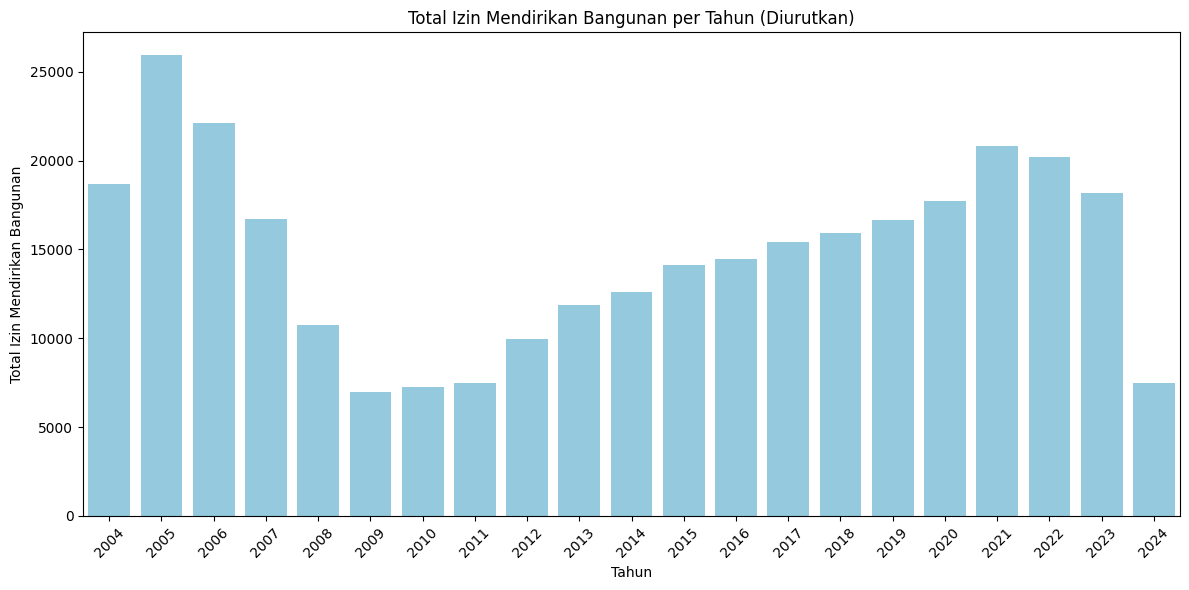

In [ ]:
df['Year'] = df['DATE'].dt.year

yearly_permits = df.groupby('Year')['Building_Permits'].sum().reset_index()

top_3_years = yearly_permits.nlargest(3, 'Building_Permits')

print("3 tahun dengan aktivitas konstruksi terbanyak:")
display(top_3_years)

plt.figure(figsize=(12, 6))
yearly_permits_sorted = yearly_permits.sort_values(by='Building_Permits', ascending=False)
sns.barplot(x='Year', y='Building_Permits', data=yearly_permits_sorted, color='skyblue')
plt.title('Total Izin Mendirikan Bangunan per Tahun (Diurutkan)')
plt.xlabel('Tahun')
plt.ylabel('Total Izin Mendirikan Bangunan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# sorted_years = yearly_permits.nlargest(21, 'Building_Permits')['Year'].values
# yearly_permits['sorted_years'] = pd.Categorical(yearly_permits['Year'], categories=sorted_years, ordered=True)

# plt.figure(figsize=(12, 6))
# yearly_permits_sorted = yearly_permits.sort_values(by='Building_Permits', ascending=False)
# sns.barplot(x='Year', y='sorted_years', data=yearly_permits_sorted, color='skyblue')
# plt.title('Total Izin Mendirikan Bangunan per Tahun (Diurutkan)')
# plt.xlabel('Tahun')
# plt.ylabel('Total Izin Mendirikan Bangunan')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

### **6. Calculate and visualize the relationship between median income growth vs. home price index. In which years did housing become significantly less affordable?**


Hitung dan visualisasikan hubungan antara pertumbuhan pendapatan median vs. indeks harga rumah. Pada tahun berapa perumahan menjadi jauh lebih terjangkau?


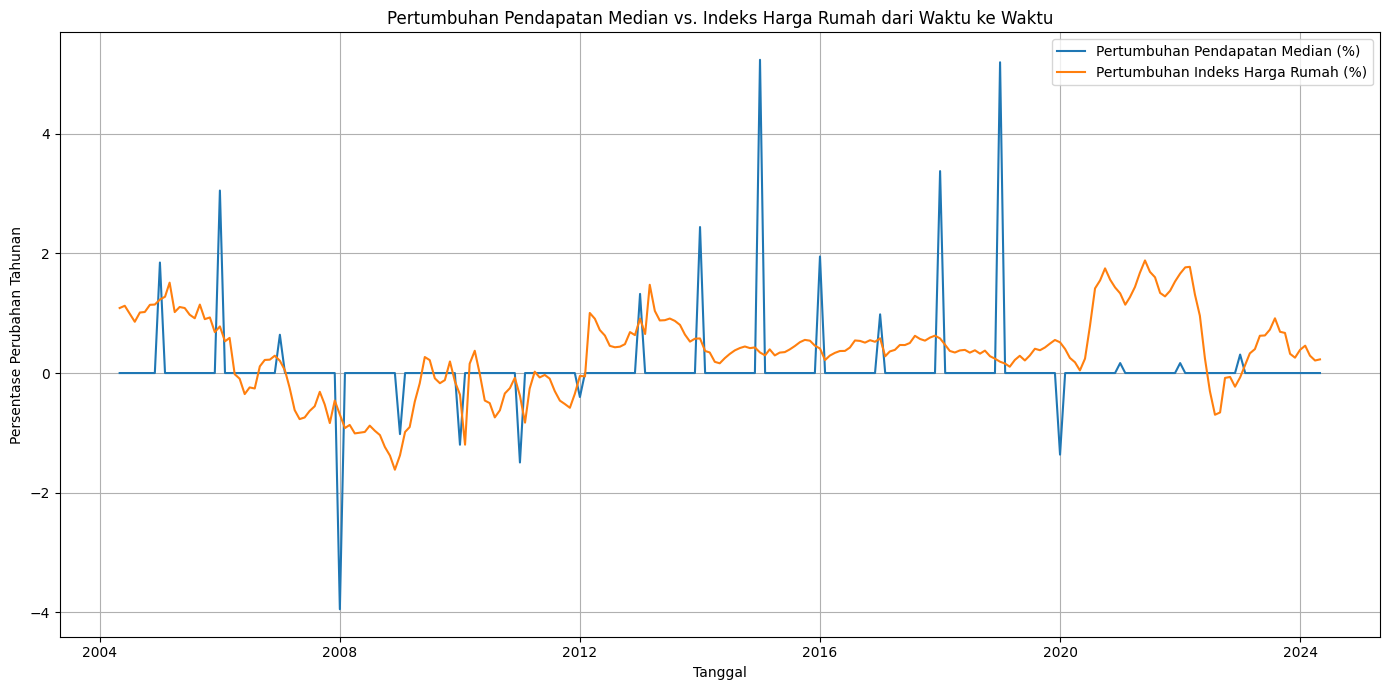

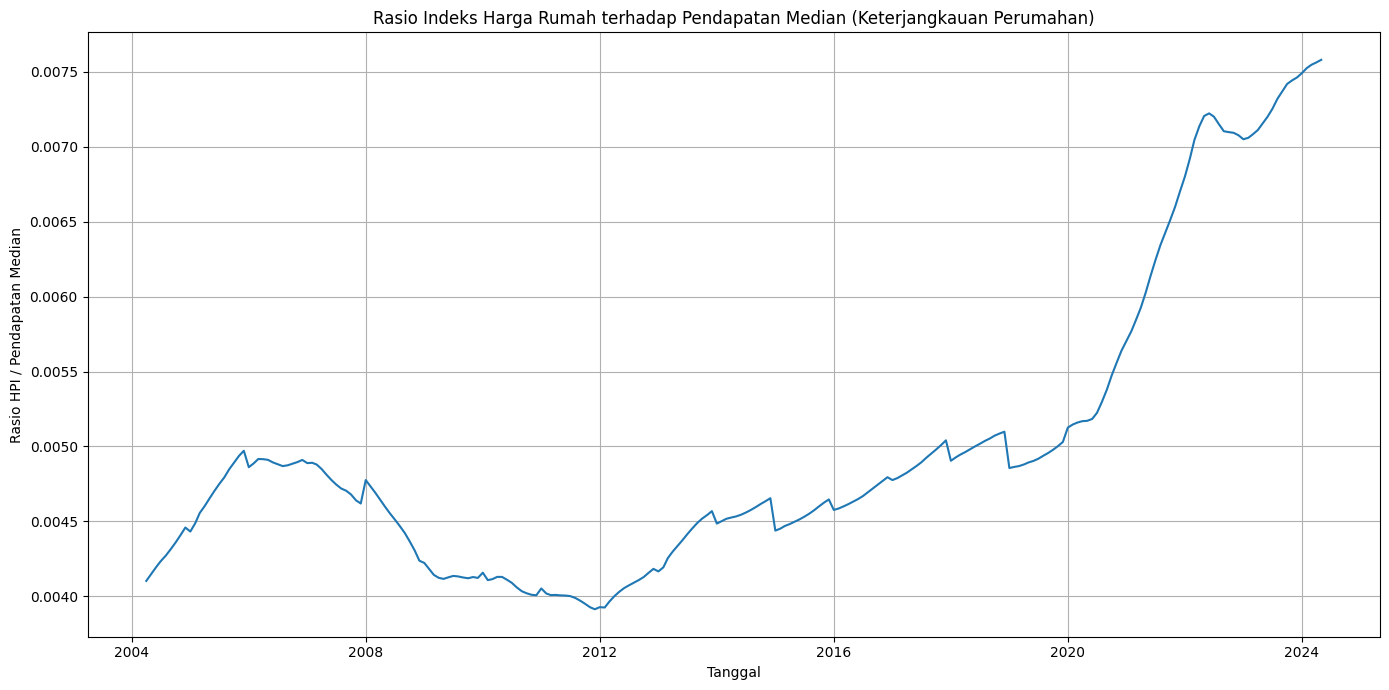


Tahun-tahun ketika perumahan menjadi jauh kurang terjangkau (rasio HPI terhadap Pendapatan meningkat pesat):
[2008 2020 2021 2022]


In [ ]:
df['Median_Income_pct_change'] = df['Median_Income'].pct_change() * 100
df['Home_Price_Index_pct_change'] = df['Home_Price_Index'].pct_change() * 100
df['HPI_to_Income_Ratio'] = df['Home_Price_Index'] / df['Median_Income']

plt.figure(figsize=(14, 7))
plt.plot(df['DATE'], df['Median_Income_pct_change'], label='Pertumbuhan Pendapatan Median (%)')
plt.plot(df['DATE'], df['Home_Price_Index_pct_change'], label='Pertumbuhan Indeks Harga Rumah (%)')
plt.title('Pertumbuhan Pendapatan Median vs. Indeks Harga Rumah dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Persentase Perubahan Tahunan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['DATE'], df['HPI_to_Income_Ratio'])
plt.title('Rasio Indeks Harga Rumah terhadap Pendapatan Median (Keterjangkauan Perumahan)')
plt.xlabel('Tanggal')
plt.ylabel('Rasio HPI / Pendapatan Median')
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify periods where housing became significantly less affordable (HPI to Income Ratio increased significantly)
df['HPI_to_Income_Ratio_change'] = df['HPI_to_Income_Ratio'].pct_change() * 100
less_affordable_years = df[df['HPI_to_Income_Ratio_change'] > df['HPI_to_Income_Ratio_change'].quantile(0.95)]['Year'].unique()

print("\nTahun-tahun ketika perumahan menjadi jauh kurang terjangkau (rasio HPI terhadap Pendapatan meningkat pesat):")
print(less_affordable_years)

### **8. Using population growth and housing starts data, identify periods where housing supply may not have kept pace with population growth. What are the implications?**


Dengan menggunakan data pertumbuhan penduduk dan pembangunan perumahan, identifikasi periode-periode di mana pasokan perumahan mungkin tidak sejalan dengan pertumbuhan penduduk. Apa implikasinya?

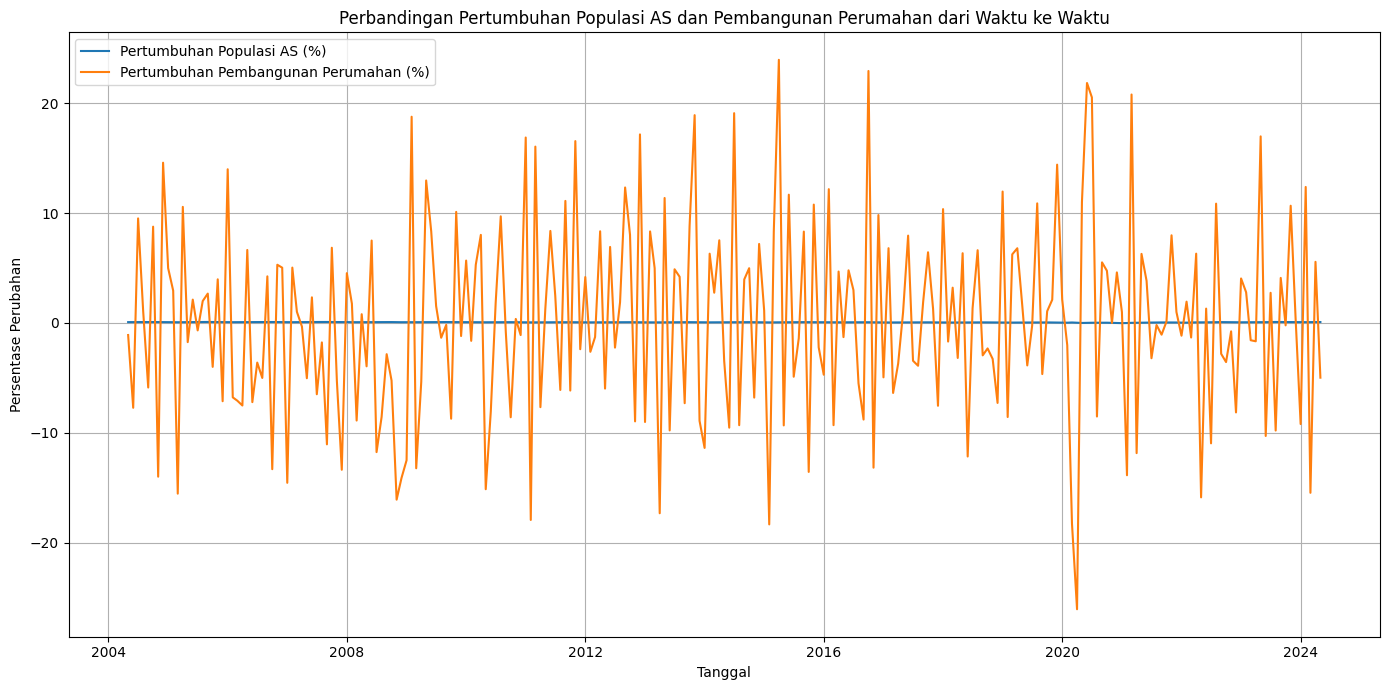


Periode ketika pasokan perumahan mungkin tidak mengimbangi pertumbuhan penduduk:
[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024]

Implikasinya dapat mencakup:
- Peningkatan harga rumah karena permintaan melebihi pasokan.
- Kurangnya ketersediaan perumahan, menyebabkan kesulitan dalam mencari tempat tinggal.
- Potensi dampak negatif pada pertumbuhan ekonomi dan mobilitas tenaga kerja.


In [ ]:
df['US_Population_pct_change'] = df['US_Population'].pct_change() * 100
df['Housing_Starts_pct_change'] = df['Housing_Starts'].pct_change() * 100

plt.figure(figsize=(14, 7))
plt.plot(df['DATE'], df['US_Population_pct_change'], label='Pertumbuhan Populasi AS (%)')
plt.plot(df['DATE'], df['Housing_Starts_pct_change'], label='Pertumbuhan Pembangunan Perumahan (%)')
plt.title('Perbandingan Pertumbuhan Populasi AS dan Pembangunan Perumahan dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Persentase Perubahan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify periods where Housing Starts growth is significantly lower than Population growth
# This is a simplified approach; more sophisticated analysis might involve rolling averages or different metrics
supply_demand_imbalance_periods = df[df['Housing_Starts_pct_change'] < df['US_Population_pct_change'] * 0.5]['Year'].unique() # Example condition

print("\nPeriode ketika pasokan perumahan mungkin tidak mengimbangi pertumbuhan penduduk:")
print(supply_demand_imbalance_periods)

print("\nImplikasinya dapat mencakup:")
print("- Peningkatan harga rumah karena permintaan melebihi pasokan.")
print("- Kurangnya ketersediaan perumahan, menyebabkan kesulitan dalam mencari tempat tinggal.")
print("- Potensi dampak negatif pada pertumbuhan ekonomi dan mobilitas tenaga kerja.")

In [ ]:
df.to_csv('clean_data.csv')